In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/Gujarati223.csv")
data.head()

,DATE,GDPC1
0,1947-04-01,2027.639
1,1947-07-01,2023.452
2,1947-10-01,2055.103
3,1948-01-01,2086.017
4,1948-04-01,2120.450


In [ ]:
data = data.rename(columns= {"DATE":"FECHA","GDPC1": "PIB"})
data.head()

,FECHA,PIB
0,1947-04-01,2027.639
1,1947-07-01,2023.452
2,1947-10-01,2055.103
3,1948-01-01,2086.017
4,1948-04-01,2120.450


In [ ]:
data.shape

(244, 2)

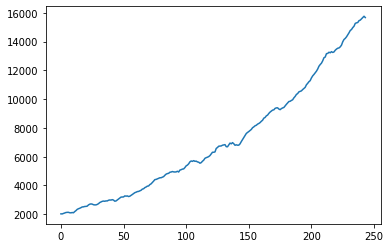

In [ ]:
fig, ax = plt.subplots()
ax.plot("PIB", data = data)
plt.show()

In [ ]:
data["LPIB"] = np.log(data["PIB"])
data.head()

,FECHA,PIB,LPIB
0,1947-04-01,2027.639,7.614627
1,1947-07-01,2023.452,7.612560
2,1947-10-01,2055.103,7.628081
3,1948-01-01,2086.017,7.643012
4,1948-04-01,2120.450,7.659384


In [ ]:
data.dtypes

FECHA     object
PIB      float64
LPIB     float64
dtype: object

In [ ]:
data["Variable Temporal"] = sm.tsa.datetools.dates_from_str(data["FECHA"])
data.tail()

,FECHA,PIB,LPIB,Variable Temporal
239,2007-01-01,15493.328,9.648165,2007-01-01
240,2007-04-01,15582.085,9.653877,2007-04-01
241,2007-07-01,15666.738,9.659295,2007-07-01
242,2007-10-01,15761.967,9.665355,2007-10-01
243,2008-01-01,15671.383,9.659592,2008-01-01


In [ ]:
data.dtypes

FECHA                        object
PIB                         float64
LPIB                        float64
Variable Temporal    datetime64[ns]
dtype: object

In [ ]:
data["Fecha Alternativa"] = sm.tsa.datetools.dates_from_range(start = "1947q2", end = "2008q1")
data.head()

,FECHA,PIB,LPIB,Variable Temporal,Fecha Alternativa
0,1947-04-01,2027.639,7.614627,1947-04-01,1947-06-30
1,1947-07-01,2023.452,7.612560,1947-07-01,1947-09-30
2,1947-10-01,2055.103,7.628081,1947-10-01,1947-12-31
3,1948-01-01,2086.017,7.643012,1948-01-01,1948-03-31
4,1948-04-01,2120.450,7.659384,1948-04-01,1948-06-30


In [ ]:
data.dtypes

FECHA                        object
PIB                         float64
LPIB                        float64
Variable Temporal    datetime64[ns]
Fecha Alternativa    datetime64[ns]
dtype: object

In [ ]:
TSdata = data.set_index("Variable Temporal")
TSdata.head()

,FECHA,PIB,LPIB,Fecha Alternativa
Variable Temporal,,,,
1947-04-01,1947-04-01,2027.639,7.614627,1947-06-30
1947-07-01,1947-07-01,2023.452,7.612560,1947-09-30
1947-10-01,1947-10-01,2055.103,7.628081,1947-12-31
1948-01-01,1948-01-01,2086.017,7.643012,1948-03-31
1948-04-01,1948-04-01,2120.450,7.659384,1948-06-30


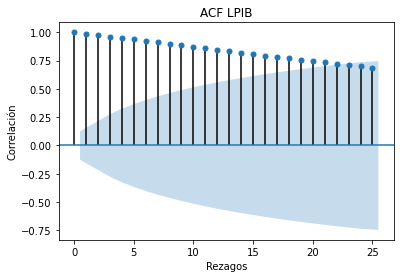

In [ ]:
fig, ax = plt.subplots()
sm.graphics.tsa.plot_acf(TSdata["LPIB"], lags = 25, ax = ax)
ax.set_title("ACF LPIB")
ax.set_xlabel("Rezagos")
ax.set_ylabel("Correlación")
plt.show()

**Test de Dickey Fuller**

In [ ]:
# H0 = NO estacionariedad, pruebas de raiz unitaria

resultados_DF = sm.tsa.stattools.adfuller(TSdata["LPIB"])
nombres = ["Estadístico", "p-value", "Rezagos", "Observaciones"]
pd.Series(resultados_DF[0:4], index=nombres)

Estadístico       -1.308172
p-value            0.625425
Rezagos            3.000000
Observaciones    240.000000
dtype: float64

In [ ]:
TSdata["DLPIB"] = TSdata["LPIB"].diff()
TSdata.head()

,FECHA,PIB,LPIB,Fecha Alternativa,DLPIB
Variable Temporal,,,,,
1947-04-01,1947-04-01,2027.639,7.614627,1947-06-30,NaN
1947-07-01,1947-07-01,2023.452,7.612560,1947-09-30,-0.002067
1947-10-01,1947-10-01,2055.103,7.628081,1947-12-31,0.015521
1948-01-01,1948-01-01,2086.017,7.643012,1948-03-31,0.014931
1948-04-01,1948-04-01,2120.450,7.659384,1948-06-30,0.016372


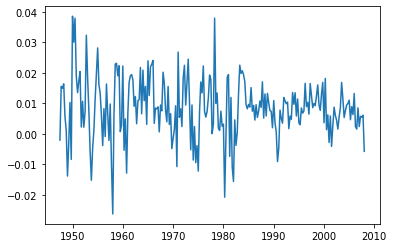

In [ ]:
fig, ax = plt.subplots()
ax.plot("DLPIB", data = TSdata)
plt.show()

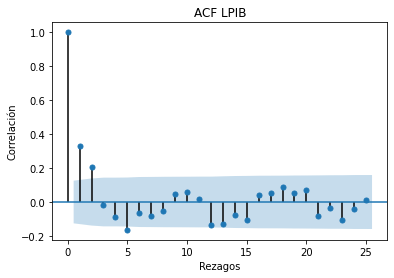

In [ ]:
fig, ax = plt.subplots()
sm.graphics.tsa.plot_acf(TSdata["DLPIB"][1:], lags = 25, ax = ax)
ax.set_title("ACF LPIB")
ax.set_xlabel("Rezagos")
ax.set_ylabel("Correlación")
plt.show()

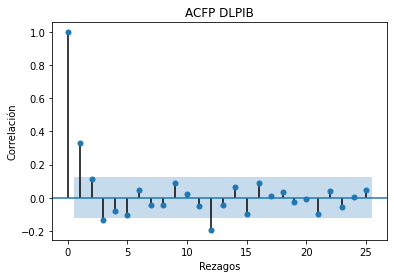

In [ ]:
fig, ax = plt.subplots()
sm.graphics.tsa.plot_pacf(TSdata["DLPIB"][1:], lags = 25, ax = ax)
ax.set_title("ACFP DLPIB")
ax.set_xlabel("Rezagos")
ax.set_ylabel("Correlación")
plt.show()

In [ ]:
resultados_DF = sm.tsa.stattools.adfuller(TSdata["DLPIB"][1:])
nombres = ["Estadístico", "p-value", "Rezagos", "Observaciones"]
pd.Series(resultados_DF[0:4], index=nombres)

Estadístico     -8.033115e+00
p-value          1.934432e-12
Rezagos          2.000000e+00
Observaciones    2.400000e+02
dtype: float64

**AR(1)**

In [ ]:
AR1 = sm.tsa.ARIMA(TSdata["DLPIB"][1:], order = (1,0,0))
resultados_AR1 = AR1.fit()
print(resultados_AR1.summary())

                              ARMA Model Results                              
Dep. Variable:                  DLPIB   No. Observations:                  243
Model:                     ARMA(1, 0)   Log Likelihood                 797.248
Method:                       css-mle   S.D. of innovations              0.009
Date:                Tue, 05 Jul 2022   AIC                          -1588.496
Time:                        17:53:04   BIC                          -1578.016
Sample:                    07-01-1947   HQIC                         -1584.275
                         - 01-01-2008                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0084      0.001      9.583      0.000       0.007       0.010
ar.L1.DLPIB     0.3329      0.061      5.478      0.000       0.214       0.452
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


**MA(2)**

In [ ]:
MA2 = sm.tsa.ARIMA(TSdata["DLPIB"][1:], order = (0,0,2))
resultados_MA2 = MA2.fit()
print(resultados_MA2.summary())

                              ARMA Model Results                              
Dep. Variable:                  DLPIB   No. Observations:                  243
Model:                     ARMA(0, 2)   Log Likelihood                 799.942
Method:                       css-mle   S.D. of innovations              0.009
Date:                Tue, 05 Jul 2022   AIC                          -1591.885
Time:                        17:54:36   BIC                          -1577.912
Sample:                    07-01-1947   HQIC                         -1586.257
                         - 01-01-2008                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0084      0.001      9.589      0.000       0.007       0.010
ma.L1.DLPIB     0.2904      0.063      4.601      0.000       0.167       0.414
ma.L2.DLPIB     0.2241      0.060      3.724    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


**ARMA(1,2)**

In [ ]:
ARMA12 = sm.tsa.ARIMA(TSdata["DLPIB"][1:], order = (1,0,2))
resultados_ARMA12 = ARMA12.fit()
print(resultados_ARMA12.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  DLPIB   No. Observations:                  243
Model:                     ARMA(1, 2)   Log Likelihood                 800.317
Method:                       css-mle   S.D. of innovations              0.009
Date:                Tue, 05 Jul 2022   AIC                          -1590.635
Time:                        17:55:22   BIC                          -1573.169
Sample:                    07-01-1947   HQIC                         -1583.600
                         - 01-01-2008                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0084      0.001      8.980      0.000       0.007       0.010
ar.L1.DLPIB     0.1967      0.200      0.982      0.327      -0.196       0.589
ma.L1.DLPIB     0.1054      0.195      0.539    

### Comparar modelos

In [ ]:
AR1aic = resultados_AR1.aic
ARMA12aic = resultados_ARMA12.aic
MA2aic = resultados_MA2.aic

In [ ]:
prueba_dict= {"AR1": AR1aic,"ARMA12": ARMA12aic,"MA2": MA2aic}
prueba_data_frame= pd.DataFrame(prueba_dict, index=["AIC"])
print(prueba_data_frame)

             AR1       ARMA12          MA2
AIC -1588.495681 -1590.634617 -1591.884539


In [ ]:
import pmdarima as pmd

In [ ]:
def  arima_auto(timeseries):
  autoarima_model = pmd.auto_arima(timeseries,
                                   start_p=1,
                                   start_q=1,
                                   test="adf",
                                   trace=True)
  return autoarima_model


In [ ]:
arima_auto(TSdata["DLPIB"][1:])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1587.956, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1562.239, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1588.495, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1581.079, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1426.618, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1589.308, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1591.758, Time=0.46 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1591.263, Time=0.66 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1588.954, Time=0.48 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1589.878, Time=0.81 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1588.836, Time=1.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1557.094, Time=0.17 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 6.410 seconds


ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True)